In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data() # load cifar dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
xTrain, xTest = xTrain/255.0, xTest/255.0 # normalize the data

In [7]:
dataAugmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), # Randomly flip the image vertically and horizontally
    layers.RandomRotation(0.2) # Randomly flip the image up to 20%
])

In [10]:
# Define the CNN model
cnnModel = models.Sequential([
    dataAugmentation,
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)), # Maxpooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2DTranspose(128, (3, 3), activation='relu'),
    layers.Conv2DTranspose(64, (3, 3), activation='relu'),
    layers.Conv2D(3, (3,3), padding= 'same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
optimizer = tf.optimizers.Adam(learning_rate=0.005) # Define the optimizer with a learning frate of 0.005
cnnModel.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics=['accuracy'])
# Compile the model with sparse categorical crossentropy loss and accuracy metric

In [14]:
# Evaluate the model
history = cnnModel.fit(xTrain, yTrain, epochs = 1, validation_data = (xTest, yTest)) # 1 is very low but is faster than higher # of epochs

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 288s 184ms/step - accuracy: 0.1017 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3028


313/313 - 16s - 50ms/step - accuracy: 0.1000 - loss: 2.3028


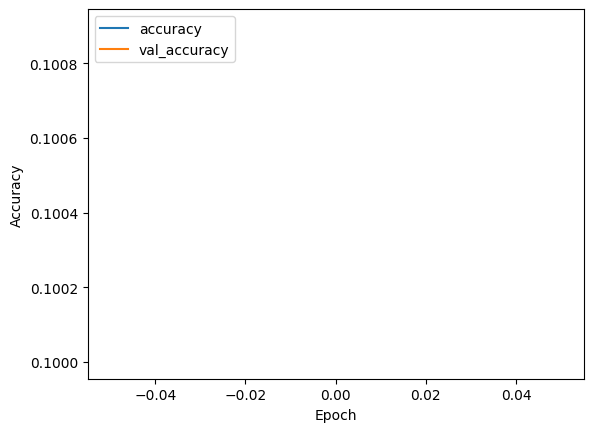

0.10000000149011612


In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.xlim([0.0, .5])
#plt.ylim([0.0, .5])
plt.legend(loc = 'upper left')
testLoss, testAcc = cnnModel.evaluate(xTest, yTest, verbose=2)
plt.show()
print(testAcc) # if there were >1 epoch it would shown something.

In [19]:
import numpy as np
predictions = cnnModel.predict(xTest) # Predict the labels for the test data
tenthPrediction = predictions[9]
print(f'Tenth prediction (raw): {tenthPrediction}')
print(f'Tenth prediction (class): {np.argmax(tenthPrediction)}') # Print the predicted class for the tenth image

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step
Tenth prediction (raw): [0.09915847 0.0978914  0.09839913 0.09708142 0.10102253 0.1042271
 0.09955992 0.09964778 0.10122387 0.10178853]
Tenth prediction (class): 5


In [25]:
!pip install pillow # pillow is a library which aims to produce clear images
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# function to resize and display the image
def displayResizedImage(image, prediction, actual):
  # Convert the image from np array to PIL image
  pilImage = Image.fromarray((image * 255).astype(np.uint8)) # convert to 8-bit per chnnael format
  resizedImage = pilImage.resize((512, 512), Image.LANCZOS) # resize the image to
  # Use ANCZOS interpolation for high-qual results
  # Display the resized image using Matplotlib
  plt.figure(figsize=(8,8)) # set the figure size
  plt.imshow(resizedImage)
  plt.title(f'Prediction: {np.argmax(prediction)}, Actual: {actual}')
  plt.axis('off') # hide axis
  plt.show()

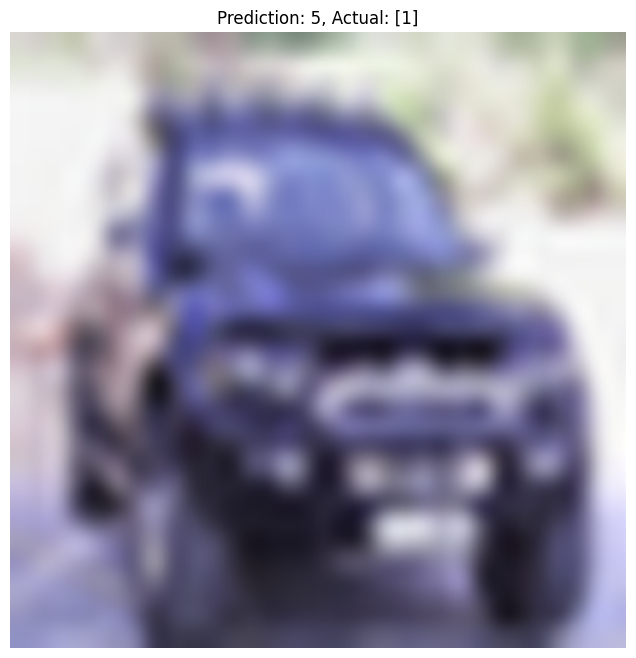

In [26]:
# Get the tenth prediction
tenthPrediction = predictions[9]
# Display the resized image
displayResizedImage(xTest[9], tenthPrediction, yTest[9])

In [31]:
def displayImages(images, labels, title):
  plt.figure(figsize=(10,10)) # set the figure size
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(labels[i])
  plt.suptitle(title)
  plt.show()

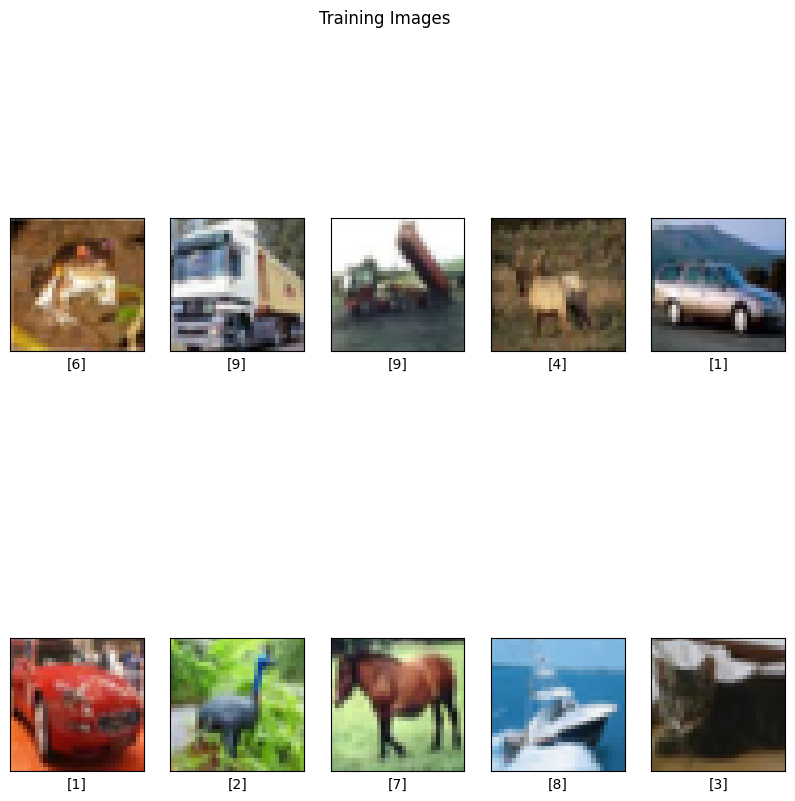

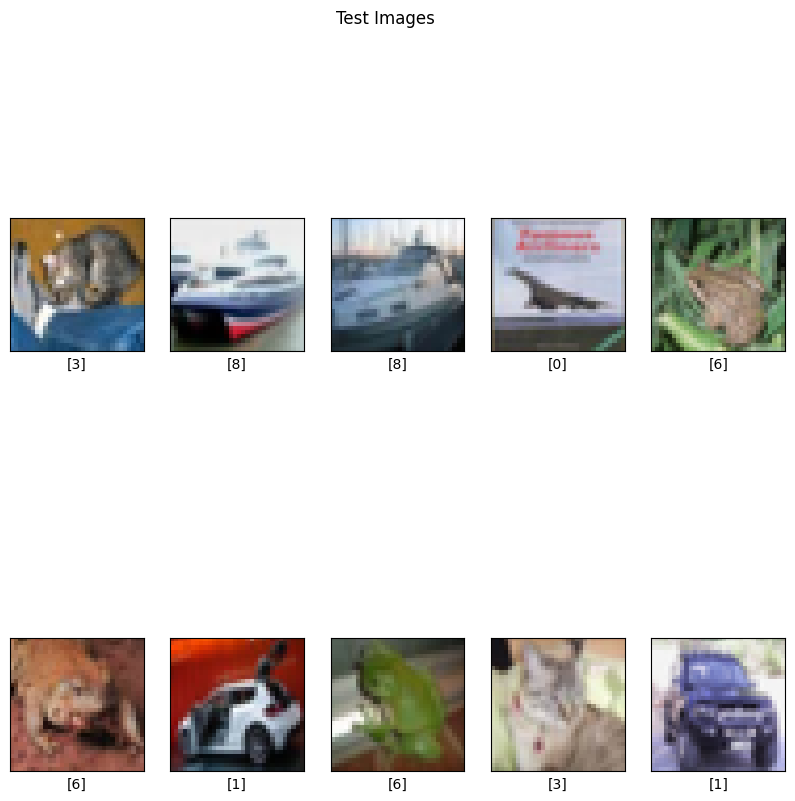

In [32]:
displayImages(xTrain, yTrain, 'Training Images')
displayImages(xTest, yTest, 'Test Images')